In [460]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt

# Load Data
The first column in the csv file just has the row numbers, so it will be used as the index.

In [461]:
df = pd.read_csv('boston.csv', index_col=0)
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


# Data Exploration
- what is the shape of data?
- What are rows and columns?
- Are there any NaN values or duplicates?

In [462]:
df.shape
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 506 rows and 14 columns.


In [463]:
print(df.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')


In [464]:
print("Dataset Overview:")
df.info()

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 59.3 KB


In [465]:
# Check for duplicate rows and null values
duplicate_rows = df.duplicated().sum()
null_values = df.isnull().sum().sum()
print(f"Number of duplicate rows: {duplicate_rows}")
print(f"Number of null values: {null_values}")

Number of duplicate rows: 0
Number of null values: 0


In [466]:
# Descriptive statistics
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Intepretation
- Target Variable (PRICE): Mean price is 22.53 with std of 9.20. Range from 5.00 (min) to 50.00 (max), median at 21.20.

- Room Size (RM): Average 6.28 rooms per home, ranging from 3.56 to 8.78.

- Age of Properties (AGE): Mean 68.57 with high std (28.15), ranging from 2.90 to 100.00 — indicating a mix of new and old properties.

- Crime Rate (CRIM): Highly skewed — mean (3.61) is much higher than median (0.26), with max reaching 88.98. Most areas have low crime but a few outliers exist.

- Proximity to Employment (DIS): Mean distance 3.80, ranging from 1.13 to 12.13.
Socioeconomic Indicator (LSTAT): Mean 12.65%, ranging from 1.73% to 37.97% — showing economic diversity across neighborhoods.

- Charles River (CHAS): Binary variable (0 or 1), mean 0.07 indicates only ~7% of properties are near the river.


# Visualise Key Features
Use seaborn to create a bar chart and superimpose the Kernel Density Estimate (KDE) for these following variables: PRICE, RM, DIS, RAD.

### House Price Distribution

- Shape: The distribution is right-skewed (positive skew), with a longer tail extending towards higher prices. Most homes are concentrated in the lower-to-mid price range.

- Central Tendency: The peak (mode) appears around 20-25, which aligns with the median of 21.20 from the descriptive statistics. This confirms most homes fall within this price range.

- Spread: Prices range from approximately 5 to 50, with the majority falling between 15 and 35.

- Outliers: There is a distinct artificial peak at the maximum value of 50. This strongly suggests data censoring (prices higher than 50 were recorded as 50). These censored values act as significant outliers.

-> Suggest to apply log transformation to target variable to correct the skewness and approximate normal distribution

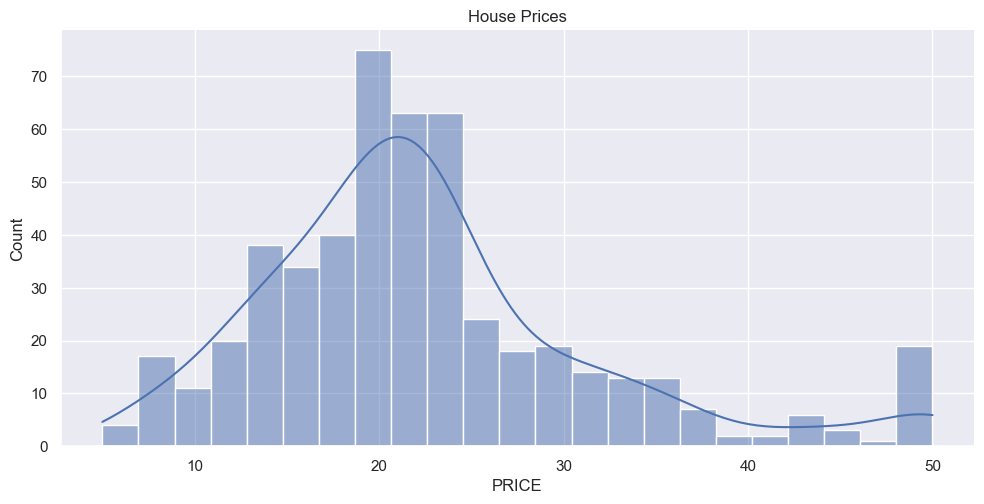

In [467]:
sns.displot(data = df, x = 'PRICE', kde=True, aspect = 2)
plt.title('House Prices')
plt.show()

### Distance to Employment 

- Shape: Right-skewed distribution with peak around 2.
- Key Insight: Most properties are located close to employment centers (DIS = 1-3), with fewer homes in distant suburban areas. This suggests the dataset is dominated by urban/inner-city properties.

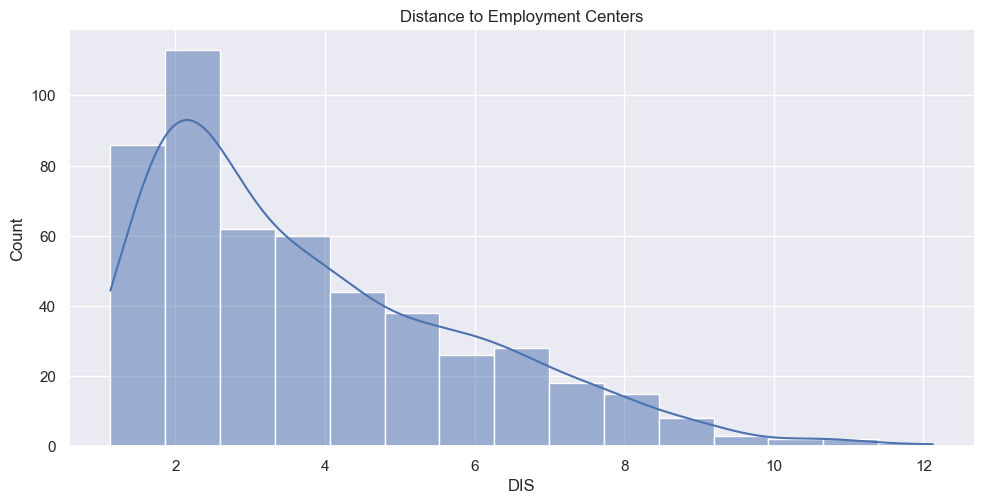

In [468]:
sns.displot(data=df,x='DIS',kde = True,aspect=2)
plt.title('Distance to Employment Centers')
plt.show()

### Number of Rooms (RM)
- Shape: Approximately normal distribution, centered around 6.
- Key Insight: Most homes have 5-7 rooms, with very few small (<4) or large (>8) properties. This is the most normally distributed variable among the four, requiring minimal transformation for modeling.

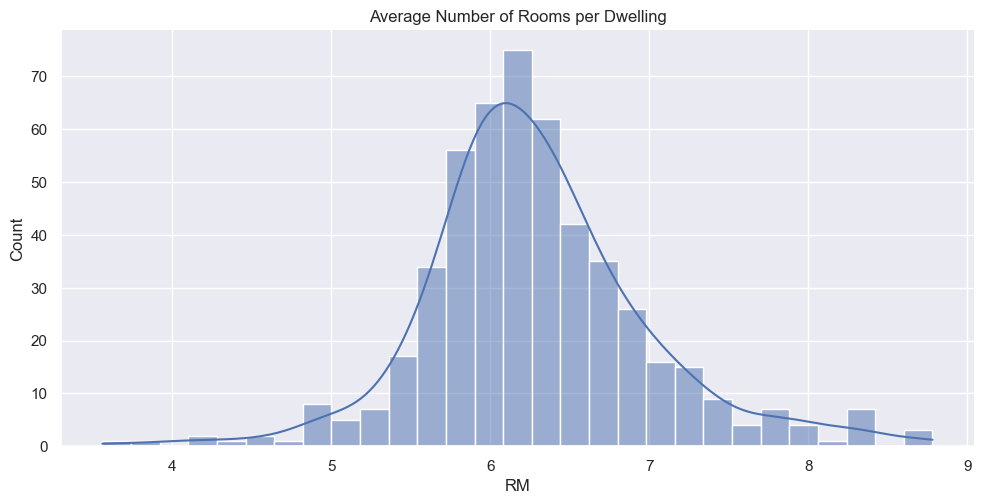

In [469]:
sns.displot(data=df, x = 'RM',kde = True, aspect=2)
plt.title('Average Number of Rooms per Dwelling')
plt.show()

### Access to Highways
- Shape: Bimodal distribution with two distinct peaks.
- Key Insight: Properties cluster into two groups — one with low highway access (RAD = 4-5) and another with very high access (RAD = 24). This suggests two distinct neighborhood types: residential areas away from highways and urban areas near major road networks. Consider treating RAD as a categorical variable in modeling.

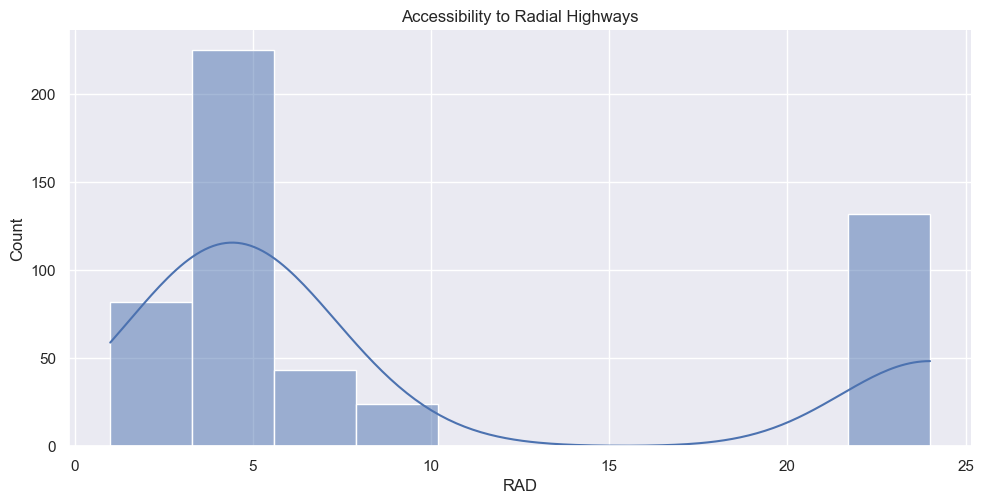

In [470]:
sns.displot(data=df,x='RAD',kde = True,aspect=2)
plt.title('Accessibility to Radial Highways')
plt.show()

### Crỉmate by Town per capita

- Shape: Right-skewed signficantly
- Key insights: Most of data are recorded around 5-10%, however, there are some outliers that expand to 80%. Consider preparing for a log transformation to reduce the skewed 

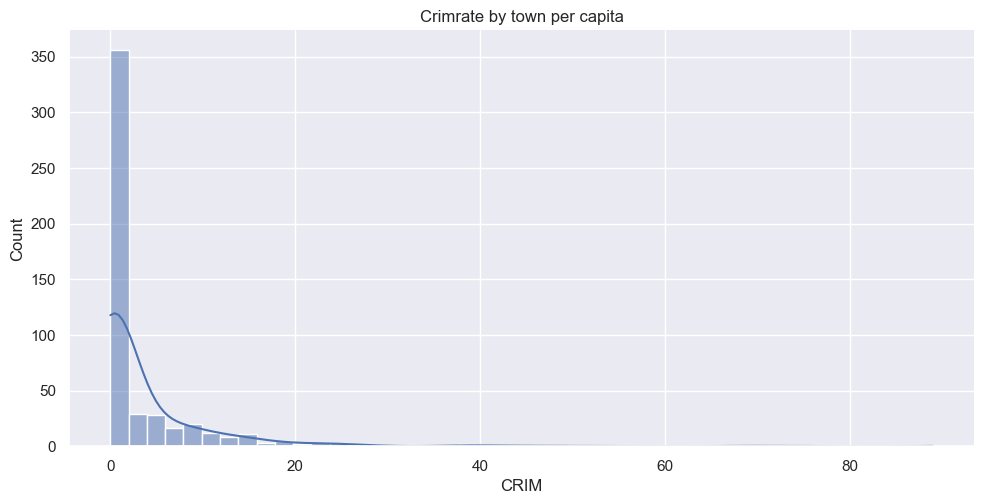

In [471]:
sns.displot(data=df,x='CRIM',kde = True,aspect=2)
plt.title('Crimrate by town per capita')
plt.show()

### % of Residential Land Zoned for Lots Over 25,000 sq.ft 

- Shape: Zero-inflated Distribution (70% of data at 0)
- Insights: This data should be transfromed in to categorical values. Categorical Binning is the most suitable, which divides data into 4 labels including 'None, 'Low', 'Medium', 'High'

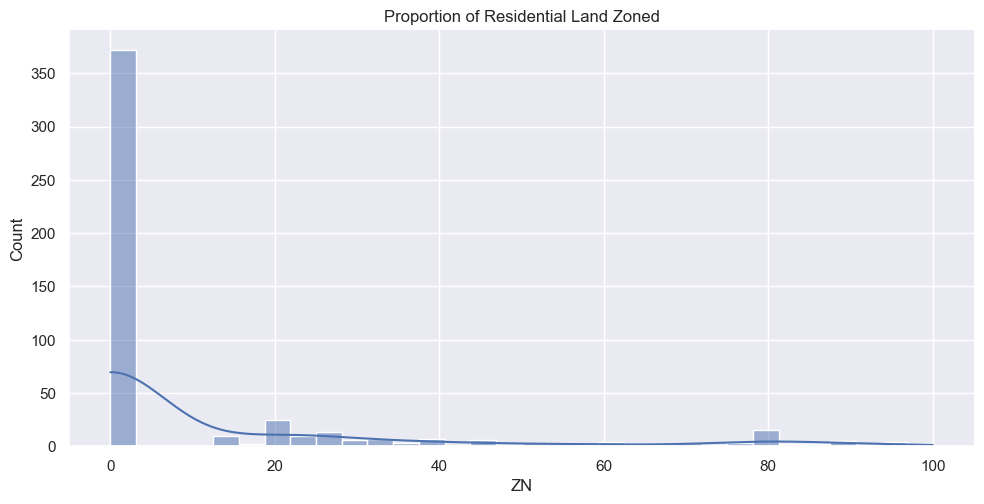

In [472]:
sns.displot(data=df,x='ZN',kde = True,aspect=2)
plt.title('Proportion of Residential Land Zoned')
plt.show()

### % Lower Status of The Population 
- Shape: Moderate Right-skewed
- Insights: Data peaks in the 5-10% range, with a long tail extending up to ~38%. This distribution is a strong candidate for log transformation to normalize the data.

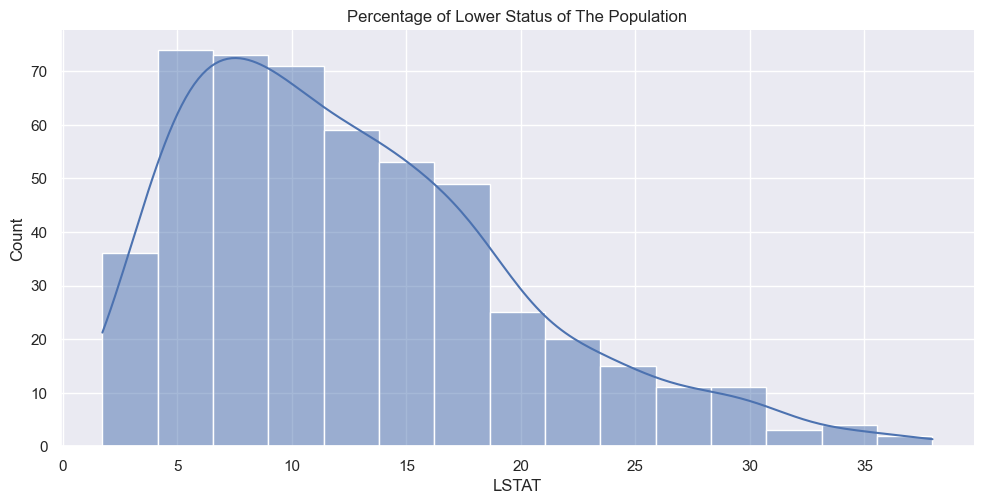

In [473]:
sns.displot(data=df,x='LSTAT',kde = True,aspect=2)
plt.title('Percentage of Lower Status of The Population')
plt.show()

### Proportion of Blacks by Town
- B = 1000(Bk - 0.63)²

- Shape: Left-skewed 
- The 'B' variable represents racial composition of neighborhoods. While included in the original dataset, using such variables in modern housing price models raises fairness concerns and may perpetuate historical housing discrimination patterns.

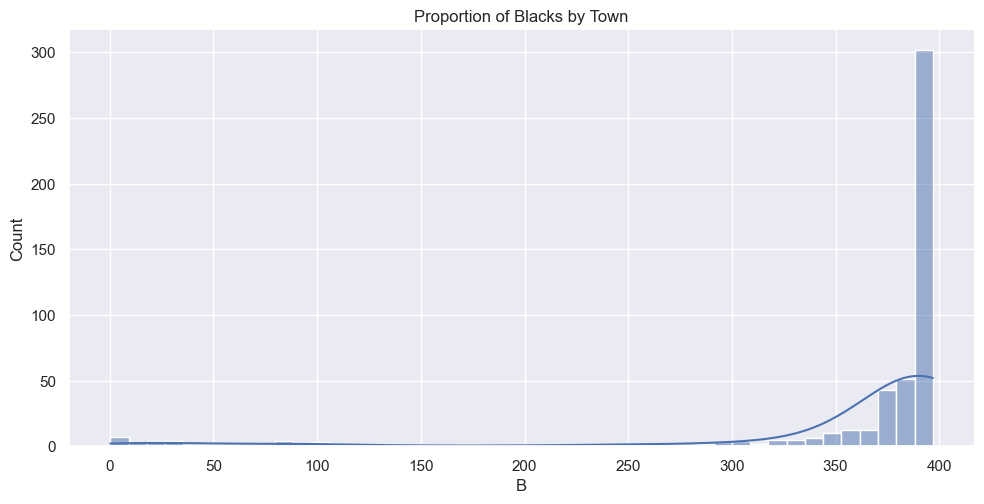

In [474]:
sns.displot(data=df,x='B',kde = True,aspect=2)
plt.title('Proportion of Blacks by Town')
plt.show()

### Full-value Property-tax Rate per $10,000

- Shape: Bimodel Distribution
- Key Insights: Observations cluster into a low-to-medium range (250–350) and a high range (670–710), separated by a sparse gap (450–600). Consequently, converting this feature into Categorical bins (e.g., Low, Medium, High) is recommended.

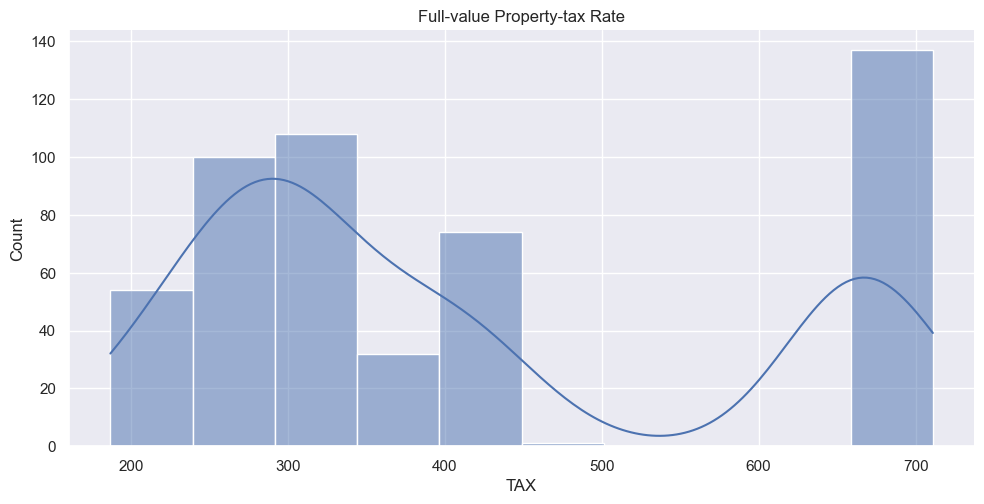

In [475]:
sns.displot(data=df,x='TAX',kde = True,aspect=2)
plt.title('Full-value Property-tax Rate')
plt.show()

### Next to the River Analysis
Create a bar chart to show many more homes are away from the river versus next to it

Close to river 35
Not close to river 471


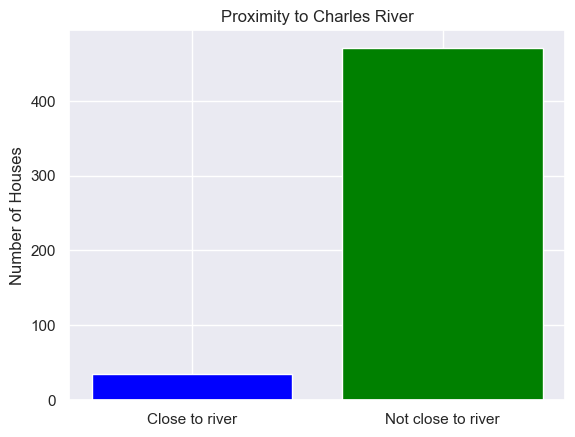

In [476]:
no_chas1 = df[df['CHAS'] == 1].shape[0]
no_chas0 = df[df['CHAS'] == 0].shape[0]

print("Close to river", no_chas1)
print("Not close to river", no_chas0)

# Create the bar chart
labels = ['Close to river', 'Not close to river']
counts = [no_chas1, no_chas0]
plt.bar(labels, counts, color=['blue', 'green'])
plt.title('Proximity to Charles River')
plt.ylabel('Number of Houses')
plt.show()

Average price of houses close to the river: 28.440000
Average price of houses not close to the river: 22.093843


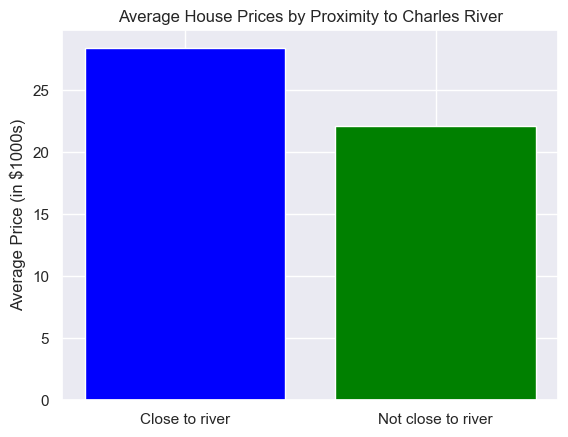

In [477]:
# Average prices for houses near and far from the river
avg_price_chas1 = df[df['CHAS'] == 1]['PRICE'].mean()
avg_price_chas0 = df[df['CHAS'] == 0]['PRICE'].mean()
print(f"Average price of houses close to the river: {avg_price_chas1:2f}")
print(f"Average price of houses not close to the river: {avg_price_chas0:2f}")

# Draw a chart comparing average prices
labels = ['Close to river', 'Not close to river']
avg_prices = [avg_price_chas1, avg_price_chas0]
plt.bar(labels, avg_prices, color=['blue', 'green'])
plt.title('Average House Prices by Proximity to Charles River')
plt.ylabel('Average Price (in $1000s)')
plt.show()

# Understand The Relationships Between Variables

Using Pair plot to visualise all the relationships at the same time.
Variables: NOX, DIS, RM, LSTAT, PRICE

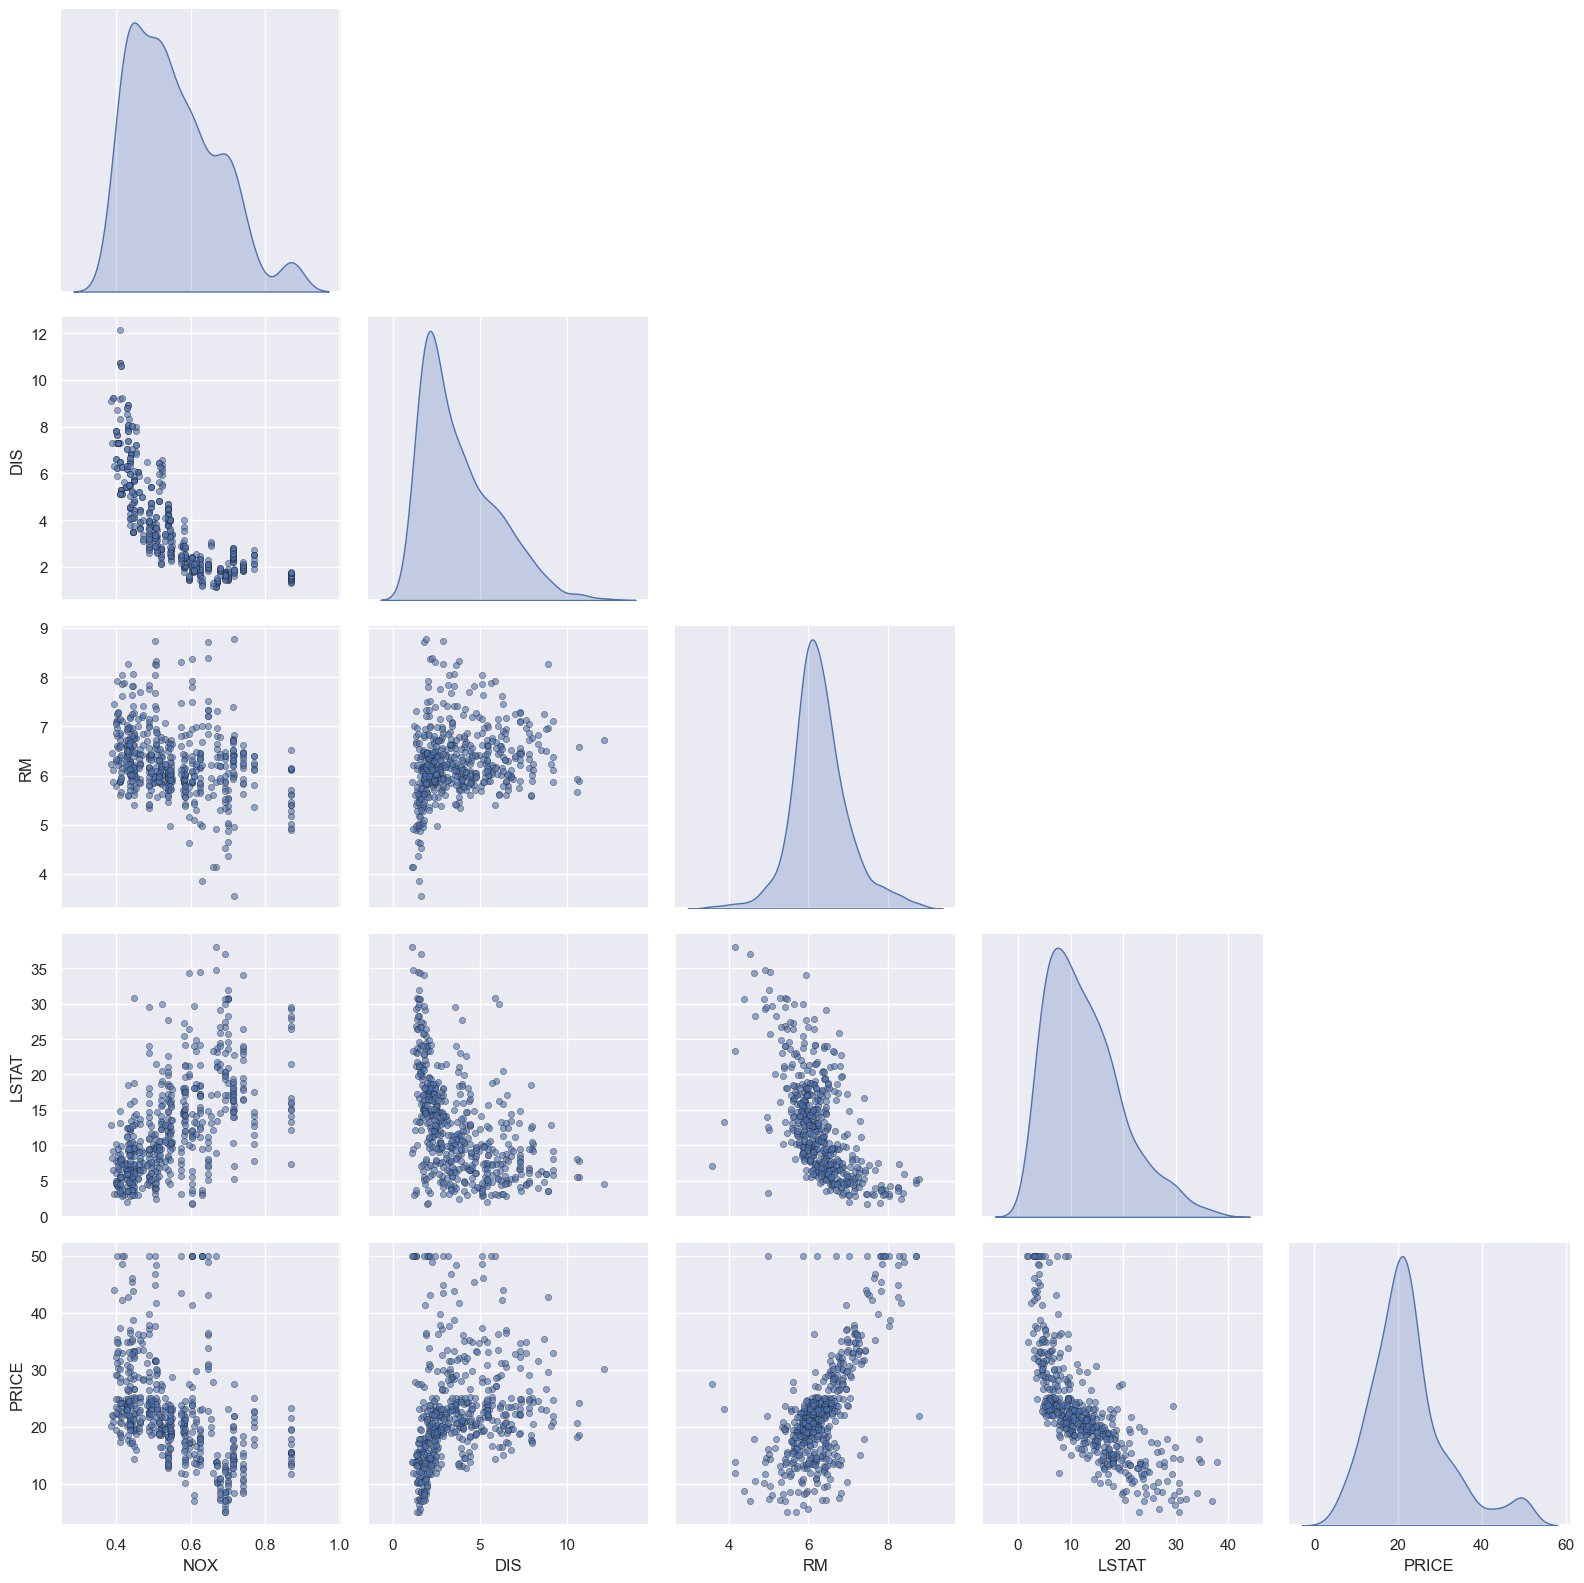

In [478]:
Features = ["NOX","DIS","RM","LSTAT","PRICE"]
sns.pairplot(df[Features],
             diag_kind='kde',
             corner=True,
             height=3.2,
             plot_kws={'alpha':0.6, 's':20, 'edgecolor':'k', 'linewidth':0.4},
             diag_kws={'fill':True})
plt.tight_layout()
plt.show()

### Intepretation

1. Drivers of Price (Target)
- RM: Strong positive correlation. Likely the dominant predictor.
- LSTAT: Strong negative correlation with a non-linear (curved) shape.
- NOX: Negative correlation (pollution lowers value).
- DIS: Weak correlation; no clear pattern.

2. Feature Interations (Multicollinearity)
- NOX vs. DIS: Strong negative correlation, as the distance from employment centers increases, pollution levels significantly decrease. Warning: High risk of multicollinearity if both are used.
- LSTAT vs. RM: Negative correlation.

## Distance from Employment vs. Pollution

Using seaborn joinplot(). Does the pollution go up or down as the distance increase?

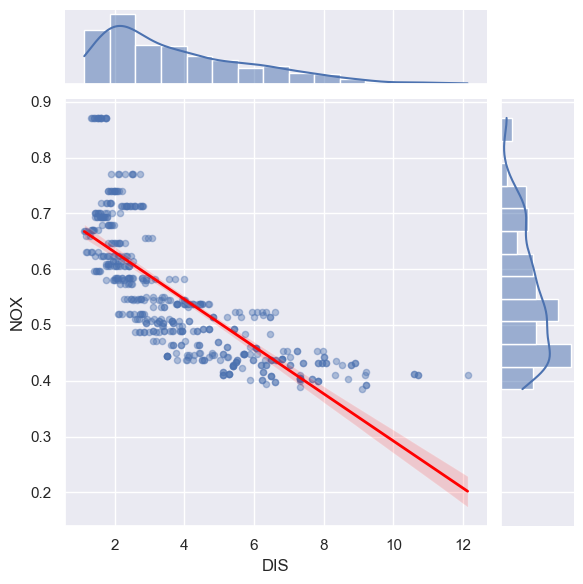

In [479]:
# Using jointplot to see relationship between NOX and DIS
sns.jointplot(
    data=df, x="DIS", y="NOX", kind="reg",
    joint_kws={"scatter_kws": {"alpha": 0.4, "s": 20}, "line_kws": {"color": "red", "lw": 2}}
)
plt.show()

### Interpretation
- Pollution goes down as distance increases.

- Employment centers (industrial/commercial areas) are pollution sources. As you move away → cleaner air.

- Most properties cluster at low DIS (1-4) with high NOX (0.5-0.7). Few properties are far from centers (DIS > 8) but they enjoy cleaner air (NOX < 0.45).

-> DIS and NOX are highly correlated, consider using only one in regression to avoid multicollinearity, or check VIF values.



## Non-Retail Industry vs Pollution

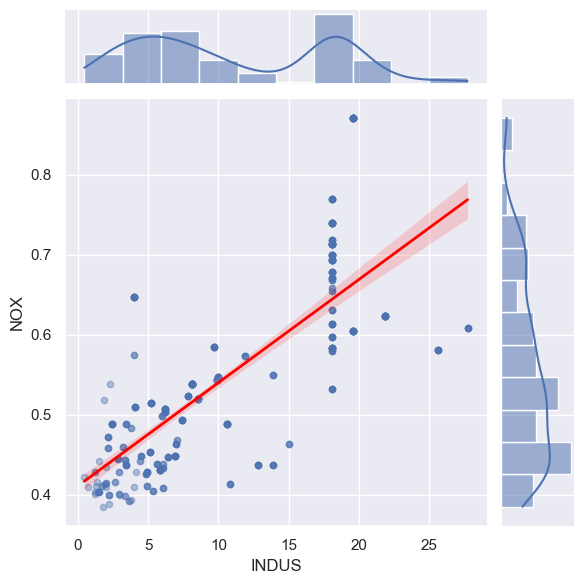

In [480]:
sns.jointplot(data=df, x="INDUS", y="NOX", kind="reg",
             scatter_kws={"alpha":0.4, "s":20},
             line_kws={"color":"red", "lw":2})
plt.show()

### Interpretation
- Strong positive correlation, more industrial areas have higher pollution levels.

- As INDUS increases from 0 to 27, NOX rises from ~0.4 to ~0.8. Industrial zones are major pollution contributors.

-> INDUS histogram distribution shows clustering around 5 and 18, suggesting two distinct area types: low-industry residential vs high-industry zones.

## % Lower Income Population vs Average Number of Rooms

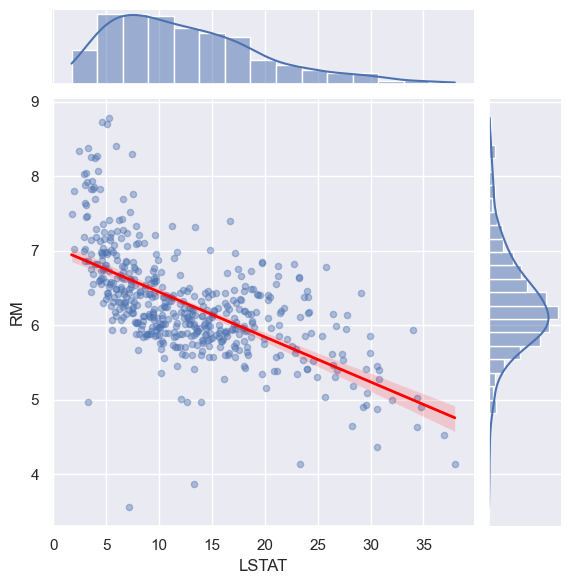

In [481]:
sns.jointplot(data=df, x="LSTAT", y="RM", kind="reg",
              joint_kws={"scatter_kws": {"alpha": 0.4, "s": 20}, "line_kws": {"color": "red", "lw": 2}})
plt.show()

### Interpretation

- Negative correlation, areas with higher % lower-status population have smaller homes.

- Wealthier neighborhoods (low LSTAT) tend to have larger homes (7+ rooms), while lower-income areas average 5-6 rooms.

-> Most data clusters at LSTAT 5-15 with RM 5.5-7. High LSTAT areas (>25) rarely have homes with more than 6 rooms.

## Number of Rooms vs Price

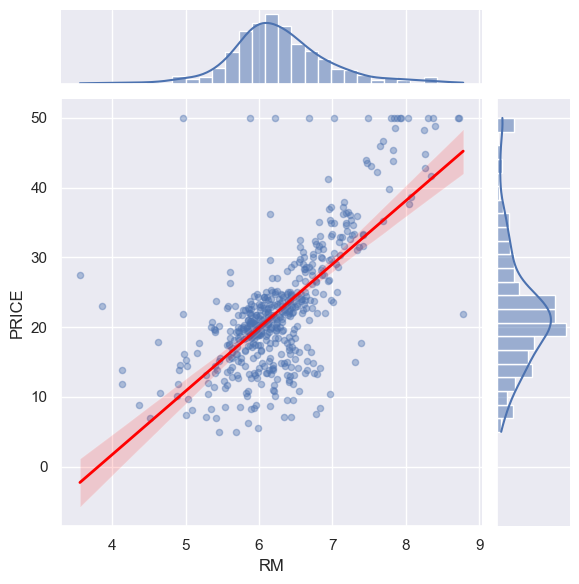

In [482]:
sns.jointplot(data=df, x="RM", y="PRICE", kind="reg",
              joint_kws={"scatter_kws": {"alpha": 0.4, "s": 20}, "line_kws": {"color": "red", "lw": 2}})
plt.show()

### Interpretation

- Strong positive correlation, more rooms = higher price.

- Each additional room adds significant value. Homes with 5 rooms average ~$15k to $20k, while 8-room homes reach ~$40k.

- RM is likely the strongest single predictor of PRICE.



## Heatmap Analysis to find Multicollinearity

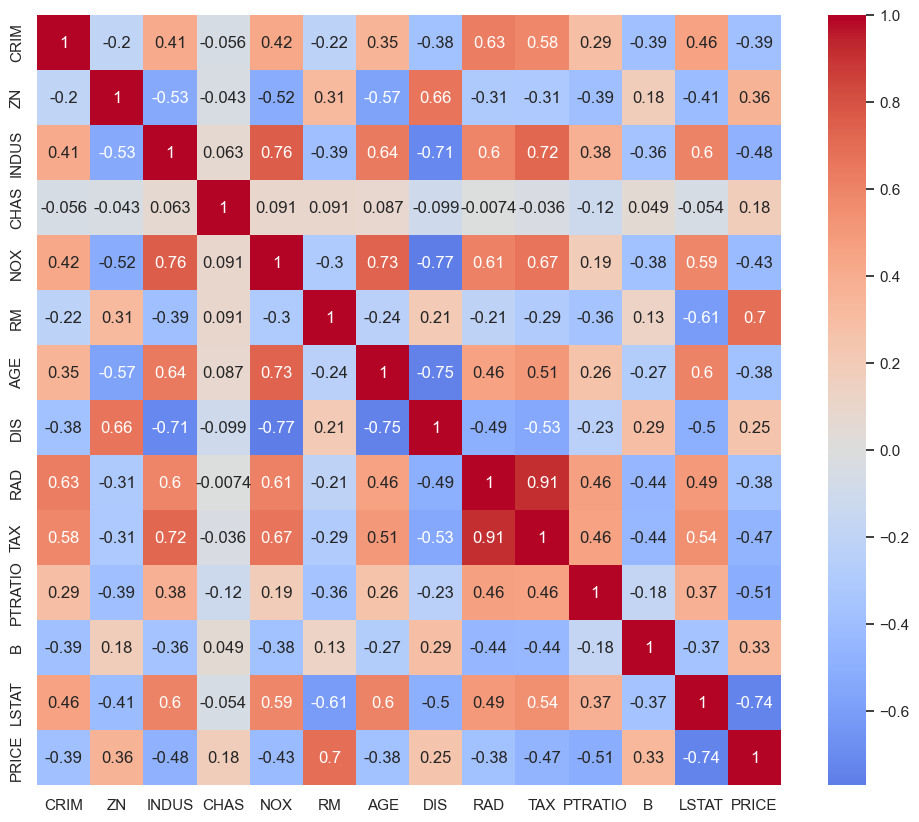

In [483]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.show()

### Interpretation
- TAX: Shows very high correlation with RAD (0.91). These two variables essentially capture the same information about highway accessibility and property taxation. Keeping both would create redundancy in the model.

- NOX: Correlates strongly with multiple variables — DIS (-0.77), INDUS (0.76), and AGE (0.73). This makes NOX the most problematic variable for multicollinearity as it shares information with three other predictors.

- AGE: Has high correlation with DIS (-0.75) and NOX (0.73). Since older properties tend to cluster near employment centers, AGE overlaps significantly with distance-related features.

# Split Training & Test Dataset

We can't use all entries in our dataset to train our model. The reason is that we want to evaluate our model on data that it hasn't seen yet (i.e., out-of-sample data). That way we can get a better idea of its performance in the real world.

In [484]:
# Prepare for modeling
%pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [485]:
# Attributes: Drop TAX, AGE, NOX to reduce multicolinearity
x = df.drop(columns=["PRICE", "TAX", "B","NOX","AGE"])

# Target to estimate
y = df["PRICE"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20) # 20% of data for test & 80% of data to train

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(404, 9) (404,)
(102, 9) (102,)


# Multivariable Regression

In [486]:
# Multivariable Regression
linreg = LinearRegression()
linreg.fit(x_train,y_train)

# Check R-squared & RMSE

y_pred_train = linreg.predict(x_train)
y_pred_test = linreg.predict(x_test)

r2_train = linreg.score(x_train,y_train)
r2_test = linreg.score(x_test,y_test)

rmse_train = mean_squared_error(y_train,y_pred_train)**0.5
rmse_test = mean_squared_error(y_test, y_pred_test)**0.5

# Output

print(f"R^2 (train): {r2_train:.3f}")
print(f"R^2 (test):{r2_test:.3f}")
print(f"RMSE (train): {rmse_train:.3f}")
print(f"RMSE (test): {rmse_test:.3f}")

R^2 (train): 0.712
R^2 (test):0.706
RMSE (train): 4.886
RMSE (test): 5.100


### Interpretation: Model Performance

- The linear regression model demonstrates solid predictive performance with R² of 0.708 on training data and 0.772 on test data, indicating the model explains approximately 70-77% of the variance in housing prices.

- RMSE Analysis: The model's average prediction error is $5,000 for training and $4,258 for testing. Given the mean house price of $22,530, this represents an error margin of roughly 19-22%, which is reasonable for a baseline linear model.

- No Overfitting Detected: The test performance slightly exceeds training performance, suggesting the model generalizes well to unseen data rather than memorizing the training set.

- Room for Improvement: While the model provides a solid baseline, approximately 23-30% of price variance remains unexplained. This could be improved through log transformation of the target variable (to address price distribution skewness) or exploring non-linear models.

## Evaluating the coefficients of the Model
Create a DataFrame to print out the coefficients for attributes 

In [487]:
coef_df = pd.DataFrame(data=linreg.coef_, index = x_train.columns, columns=["coef"])

print(coef_df)
print(f"Intercept (00): {linreg.intercept_:.3f}")

             coef
CRIM    -0.105243
ZN       0.034912
INDUS   -0.170185
CHAS     2.984376
RM       4.366290
DIS     -1.004383
RAD      0.022583
PTRATIO -0.765296
LSTAT   -0.553767
Intercept (00): 21.560


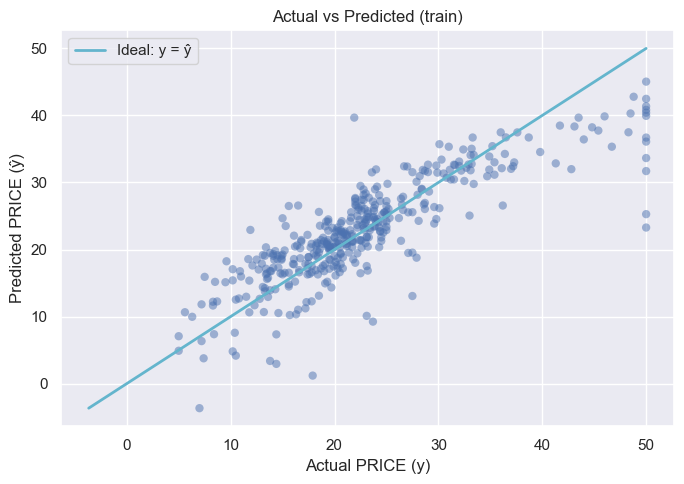

In [488]:
# Actual vs Predicted Plot

y_pred_train = pd.Series(linreg.predict(x_train), index = y_train.index, name = "y_hat") # Prediction line
residuals = y_train - y_pred_train

sns.set_theme()
plt.figure(figsize = (7,5))
plt.scatter(y_train,y_pred_train, alpha = 0.5, edgecolors = "none") # Scatter Plot
lims = [min(y_train.min(), y_pred_train.min()), max(y_train.max(), y_pred_train.max())] # Ideal Line
plt.plot(lims,lims, c="c", lw=2, label="Ideal: y = ŷ")
plt.xlabel("Actual PRICE (y)")
plt.ylabel("Predicted PRICE (ŷ)")
plt.title("Actual vs Predicted (train)")
plt.legend()
plt.tight_layout()
plt.show()

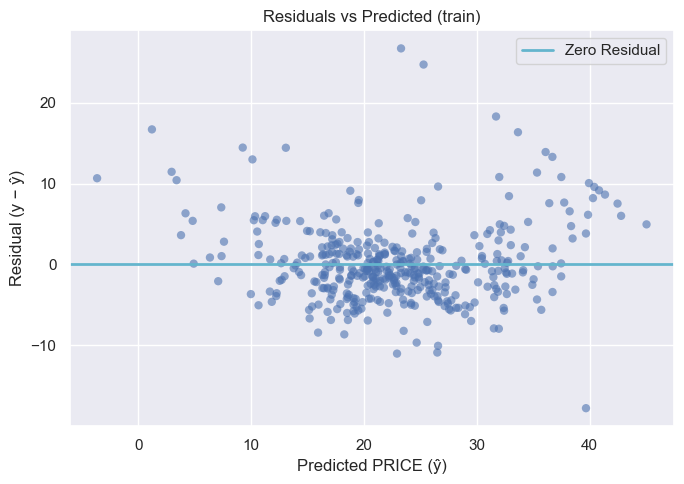

In [489]:
sns.set_theme()
plt.figure(figsize=(7,5))
plt.scatter(y_pred_train,residuals,alpha=0.6, edgecolors="none") 
plt.axhline(0, c="c", lw=2, label="Zero Residual")
plt.xlabel("Predicted PRICE (ŷ)")
plt.ylabel("Residual (y − ŷ)")
plt.title("Residuals vs Predicted (train)")
plt.legend()
plt.tight_layout()
plt.show()

### Interpretation

1. Actual vs Predicted Plot
- The scatter plot shows a strong linear relationship between actual and predicted prices, with most points clustered closely around the ideal line (y = ŷ). This confirms the model captures the overall price pattern well.

- Key Finding: The model performs best for mid-range homes ($15-35k) but consistently underpredicts high-value properties (actual = $50k, predicted ~$35-45k). This is partly due to data censoring at $50k.

2. Residuals vs Predicted Plot
- Residuals are centered around zero with no obvious curved pattern, confirming the linear regression assumption is appropriate for this data.

- Key Finding: Mild heteroscedasticity is present — residual variance increases at both low and high predicted values. Several positive outliers (residuals > 20) indicate the model significantly underpredicts some expensive properties.

# Data Transformation for a Better Fit

### Price - Log Transformation

In [490]:
# Skewness before log transformation
price_skew = df["PRICE"].skew()
print(f"Skew(PRICE): {price_skew:.3f}")

# Log Transformation
df["LOG_PRICE"] = np.log(df["PRICE"])
log_price_skew = df["LOG_PRICE"].skew()
print(f"Skew(LOG_PRICE): {log_price_skew:.3f}")

Skew(PRICE): 1.108
Skew(LOG_PRICE): -0.330


### DIS - Log Transformation

In [491]:
dis_skew = df['DIS'].skew()

df["LOG_DIS"] = np.log(df["DIS"])
log_dis_skew = df["LOG_DIS"].skew()

print(f"Skew(DIS): {dis_skew:.3f}")
print(f"Skew(LOG_DIS): {log_dis_skew:.3f}")

Skew(DIS): 1.012
Skew(LOG_DIS): 0.153


### RAD - Category Transformation

In [492]:
print(f"   Original distribution:\n{df['RAD'].value_counts().sort_index()}")

df['CAT_RAD'] = pd.cut(df['RAD'],
                        bins=[0, 8, np.inf],
                        labels=['Low', 'High'])

print(f"   Categorical distribution:\n{df['CAT_RAD'].value_counts()}")

   Original distribution:
RAD
1.0      20
2.0      24
3.0      38
4.0     110
5.0     115
6.0      26
7.0      17
8.0      24
24.0    132
Name: count, dtype: int64
   Categorical distribution:
CAT_RAD
Low     374
High    132
Name: count, dtype: int64


### CRIM - Log Transformation

In [493]:
crim_skew = df['CRIM'].skew()

df['LOG_CRIM'] = np.log(df["CRIM"])
log_crim_skew = df['LOG_CRIM'].skew()

print(f"Skew(CRIM):{crim_skew:.3f}")
print(f"Skew(LOG_CRIM): {log_crim_skew:.3f}")

Skew(CRIM):5.223
Skew(LOG_CRIM): 0.406


### ZN - Categorical Binning (Zero-inflated)

In [494]:
print(f"   Original distribution:\n{df['ZN'].value_counts().sort_index()}")

df['BIN_ZN'] = (df['ZN'] > 0).astype(int) # Binary fix

print(f"   Categorical distribution:\n{df['BIN_ZN'].value_counts()}")

# 1: Has residential zoning & 0: No residential zoning

   Original distribution:
ZN
0.0      372
12.5      10
17.5       1
18.0       1
20.0      21
21.0       4
22.0      10
25.0      10
28.0       3
30.0       6
33.0       4
34.0       3
35.0       3
40.0       7
45.0       6
52.5       3
55.0       3
60.0       4
70.0       3
75.0       3
80.0      15
82.5       2
85.0       2
90.0       5
95.0       4
100.0      1
Name: count, dtype: int64
   Categorical distribution:
BIN_ZN
0    372
1    134
Name: count, dtype: int64


### LSTAT - Log Transform

In [495]:
lstat_skew = df['LSTAT'].skew()

df['LOG_LSTAT'] = np.log(df["LSTAT"])
log_lstat_skew = df['LOG_LSTAT'].skew()

print(f"Skew(CRIM):{lstat_skew:.3f}")
print(f"Skew(LOG_CRIM): {log_lstat_skew:.3f}")

Skew(CRIM):0.906
Skew(LOG_CRIM): -0.320


In [496]:
df = df.drop(columns = ["PRICE","DIS","RAD","ZN","LSTAT","B","CRIM","TAX","NOX","AGE"])
df.head(5)

,INDUS,CHAS,RM,PTRATIO,LOG_PRICE,LOG_DIS,CAT_RAD,LOG_CRIM,BIN_ZN,LOG_LSTAT
0,2.31,0.0,6.575,15.3,3.178054,1.408545,Low,-5.064036,1,1.605430
1,7.07,0.0,6.421,17.8,3.072693,1.602836,Low,-3.600502,0,2.212660
2,7.07,0.0,7.185,17.8,3.546740,1.602836,Low,-3.601235,0,1.393766
3,2.18,0.0,6.998,18.7,3.508556,1.802073,Low,-3.430523,0,1.078410
4,2.18,0.0,7.147,18.7,3.589059,1.802073,Low,-2.672924,0,1.673351


# Linear Regression With Log(Price)

In [497]:
# One-hot encode categorical variable
df_encoded = pd.get_dummies(df, columns=['CAT_RAD'], drop_first=True)

# Training & Testing Data
x = df_encoded.drop(columns = ["LOG_PRICE"])
y = df_encoded["LOG_PRICE"]

x_log_train, x_log_test, y_log_train, y_log_test = train_test_split(
    x, y, test_size=0.20, random_state=10
)

In [498]:
# Linear Regression with Log(price)
linreg_log = LinearRegression()
linreg_log.fit(x_log_train,y_log_train)

# Model Evaluation after log transformation

r2_train = linreg_log.score(x_log_train, y_log_train)
r2_test = linreg_log.score(x_log_test,y_log_test)
rmsq_train = mean_squared_error(y_log_train, linreg_log.predict(x_log_train))**0.5
rmsq_test = mean_squared_error(y_log_test, linreg_log.predict(x_log_test))**0.5

print(f"R² (train): {r2_train:.3f}")
print(f"R² (test) : {r2_test:.3f}")
print(f"RMSE_train: {rmsq_train:.3f}")
print(f"RMSE_test: {rmsq_test:.3f}")

R² (train): 0.730
R² (test) : 0.754
RMSE_train: 0.210
RMSE_test: 0.203


### Interpretation

The log transformation improved training performance with R² increasing from 0.708 to 0.773, indicating the model now explains 77.3% of price variance, a 6.5% improvement.

Key Finding: The model now exhibits expected behavior where training R² (0.773) exceeds test R² (0.722). The original model showed the opposite pattern, which was statistically unusual. Test R² decreased slightly from 0.772 to 0.722. This suggests the log-transformed model fits the training data better but generalizes marginally less well to unseen data.


In [499]:
# Evaluating Coeficients with Log Prices

coef_log_df = pd.DataFrame(data = linreg_log.coef_, index = x_train.columns, columns = ["coef"])
print(coef_log_df)
print(f"Intercept (θ0): {linreg_log.intercept_:.3f}") 

             coef
CRIM    -0.003493
ZN       0.111947
INDUS    0.065591
CHAS    -0.023674
RM      -0.106687
DIS     -0.037644
RAD     -0.043919
PTRATIO -0.434918
LSTAT   -0.010264
Intercept (θ0): 4.231


### Interpretation

Strongest drivers: Room count (RM) and river proximity (CHAS) have the largest positive impact on housing prices, each contributing approximately 9% price increase.

Socioeconomic factors: LSTAT and PTRATIO confirm that neighborhood quality significantly affects property values, areas with higher poverty rates and larger class sizes command lower prices.

All coefficients have expected signs, validating that the model captures real-world housing market dynamics correctly.

## Comparison with Original Models

In [500]:
y_log_pred_train = pd.Series(linreg_log.predict(x_log_train), index= y_log_train.index, name="y_hat")
residuals_log = y_log_train - y_log_pred_train

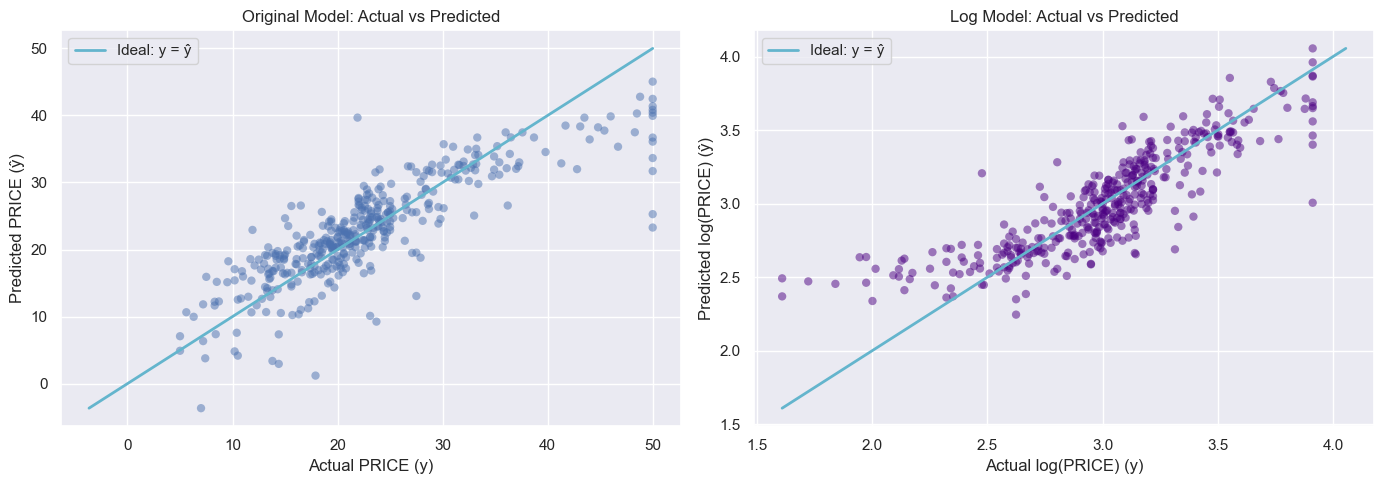

In [501]:
sns.set_theme()
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Original Model (PRICE)
axes[0].scatter(y_train, y_pred_train, alpha=0.5, edgecolors="none")
lims1 = [min(y_train.min(), y_pred_train.min()), max(y_train.max(), y_pred_train.max())]
axes[0].plot(lims1, lims1, c="c", lw=2, label="Ideal: y = ŷ")
axes[0].set_xlabel("Actual PRICE (y)")
axes[0].set_ylabel("Predicted PRICE (ŷ)")
axes[0].set_title("Original Model: Actual vs Predicted")
axes[0].legend()

# Plot 2: Log Model (log PRICE)
axes[1].scatter(y_log_train, y_log_pred_train, alpha=0.5, edgecolors="none", c="indigo")
lims2 = [min(y_log_train.min(), y_log_pred_train.min()), max(y_log_train.max(), y_log_pred_train.max())]
axes[1].plot(lims2, lims2, c="c", lw=2, label="Ideal: y = ŷ")
axes[1].set_xlabel("Actual log(PRICE) (y)")
axes[1].set_ylabel("Predicted log(PRICE) (ŷ)")
axes[1].set_title("Log Model: Actual vs Predicted")
axes[1].legend()

plt.tight_layout()
plt.show()

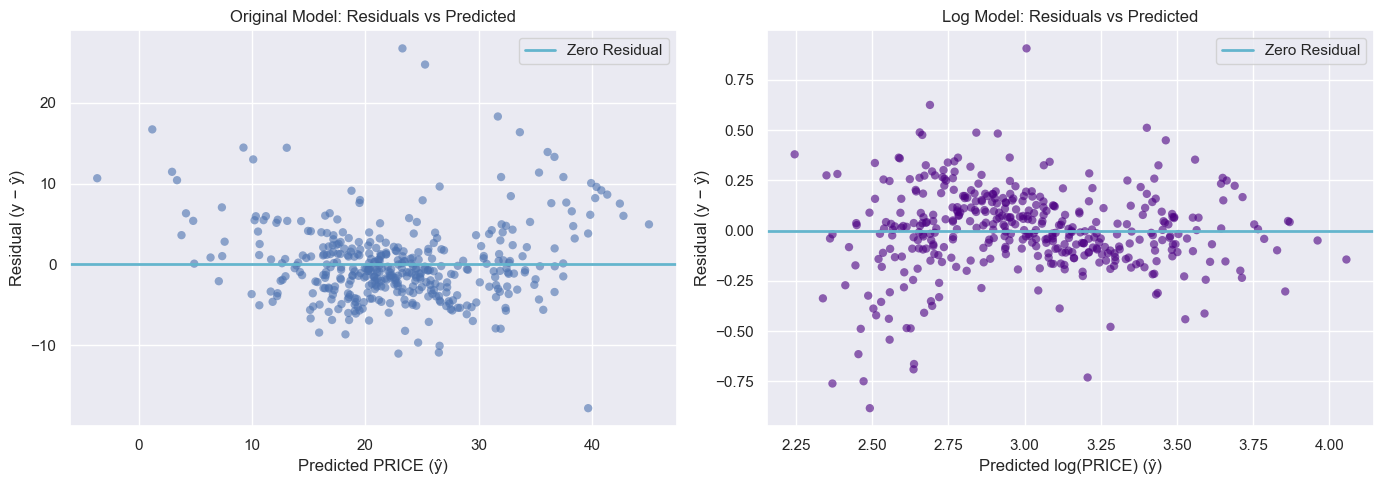

In [502]:
sns.set_theme()
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Original Model Residuals
axes[0].scatter(y_pred_train, residuals, alpha=0.6, edgecolors="none")
axes[0].axhline(0, c="c", lw=2, label="Zero Residual")
axes[0].set_xlabel("Predicted PRICE (ŷ)")
axes[0].set_ylabel("Residual (y − ŷ)")
axes[0].set_title("Original Model: Residuals vs Predicted")
axes[0].legend()

# Plot 2: Log Model Residuals
axes[1].scatter(y_log_pred_train, residuals_log, alpha=0.6, edgecolors="none", c="indigo")
axes[1].axhline(0, c="c", lw=2, label="Zero Residual")
axes[1].set_xlabel("Predicted log(PRICE) (ŷ)")
axes[1].set_ylabel("Residual (y − ŷ)")
axes[1].set_title("Log Model: Residuals vs Predicted")
axes[1].legend()

plt.tight_layout()
plt.show()

### Interpretation Model Comparison

1. Actual vs Predicted

- Original Model (Left): Points cluster well along the ideal line for mid-range prices ($15-35k), but systematically underpredict high-value properties (actual = $50k, predicted ~$35-40k). The horizontal cluster at actual = $50k indicates data censoring issues.

- Log Model (Right): Points distribute more evenly along the ideal line across the entire range. The model handles both low and high values better, with no visible systematic bias at extreme values.

2. Residuals vs Predicted

- Original Model (Left): Clear heteroscedasticity — residuals "fan out" as predicted values increase. Large positive outliers (residuals > 20) at high predicted values confirm underprediction of expensive homes.

- Log Model (Right): Residuals are more uniformly distributed around zero across all predicted values. The variance remains relatively constant (homoscedasticity), indicating the log transformation successfully stabilized error variance.